In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.stats import linregress

In [42]:
df = pd.read_csv("data.csv")
df["error"] = np.sqrt((df["pi"] - pi) ** 2)
print(df.head())

   nodes   darts  time       pi     error
0      2  1000.0  0.09  3.12400  0.017593
1      4  1000.0  0.13  3.06000  0.081593
2      8  1000.0  0.16  3.17000  0.028407
3     16  1000.0  0.18  3.13750  0.004093
4     32  1000.0  0.19  3.13125  0.010343


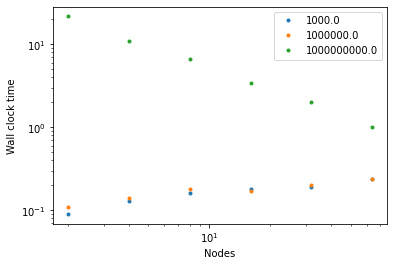

In [43]:
fig, ax = plt.subplots()
for key, grp in df.groupby("darts"):
    grp.plot(ax=ax, label=key, logx=True, logy=True, \
             x="nodes", y="time", kind="line", linestyle='None', marker='.')
ax.set_xlabel("Nodes")
ax.set_ylabel("Wall clock time")
plt.savefig("time_scaling.png")

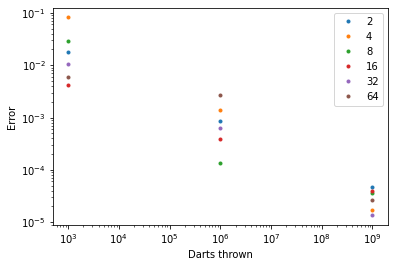

In [44]:
fig2, ax2 = plt.subplots()
for key, grp in df.groupby(["nodes"]):
    grp.plot(ax=ax2, logy=True, logx=True, label=key, \
             x="darts", y="error", kind="line", linestyle='None', marker='.')
ax2.set_xlabel("Darts thrown")
ax2.set_ylabel("Error")
plt.savefig("error_scaling.png")

In [56]:
slopes = {}
for key, group in df.groupby(["nodes"]):
    darts = np.log(group.loc[:, "darts"])
    err = np.log(group.loc[:, "error"])
    linreg_results = li
    ess(darts, err)
    slopes[key] = [linreg_results.slope]

slope_df = pd.DataFrame.from_dict(slopes, orient="index")
slope_df.head()

mean_slope = slope_df.mean()
std_slope = slope_df.std()
print("mean slope = {}".format(mean_slope.loc[0]))
print("std slope = {}".format(std_slope.loc[0]))

mean slope = -0.4555267716147096
std slope = 0.09486172244259576
